<a href="https://colab.research.google.com/github/tanay4343/Delhi_Power_Consumption/blob/main/Power_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from ipywidgets import interact

In [5]:
df = pd.read_csv('delhi_power_consumption_2023.csv')

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df['Year'] = df['Date'].dt.year

In [7]:
label_encoder = LabelEncoder()
df['Day Type Encoded'] = label_encoder.fit_transform(df['Day Type'])


In [8]:
features = ['Day', 'Month', 'Year', 'Weekday', 'Temperature (°C)', 'Humidity (%)', 'Day Type Encoded']
targets = ['Electricity Demand (MW)', 'East Delhi Demand (MW)', 'West Delhi Demand (MW)',
           'North Delhi Demand (MW)', 'South Delhi Demand (MW)', 'Peak Demand (MW)']


In [9]:
X = df[features]
y = df[targets]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

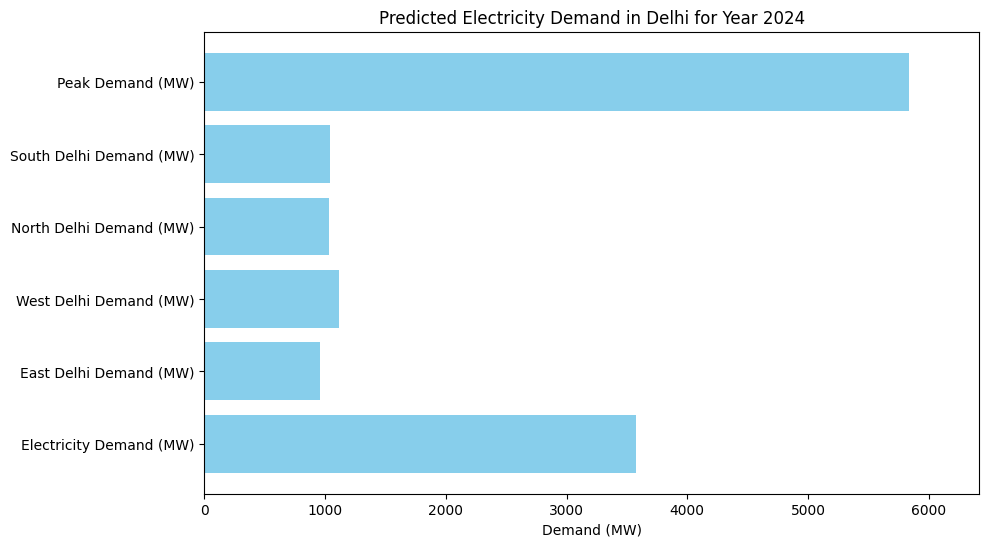

In [16]:
def Histogram(year, day, month, weekday, temperature, humidity, day_type):
    # Encoding the day_type
    day_type_encoded = label_encoder.transform([day_type])[0]

    # Creating the input DataFrame
    input_data = pd.DataFrame({
        'Day': [day],
        'Month': [month],
        'Year': [year],
        'Weekday': [weekday],
        'Temperature (°C)': [temperature],
        'Humidity (%)': [humidity],
        'Day Type Encoded': [day_type_encoded]
    })

    # Predicting electricity demand
    predicted_values = model.predict(input_data)[0]

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.barh(targets, predicted_values, color='skyblue')
    plt.xlabel("Demand (MW)")
    plt.title(f"Predicted Electricity Demand in Delhi for Year {year}")
    plt.xlim([0, max(predicted_values) * 1.1])
    plt.show()

# Example usage:
Histogram(
    year=2024,
    day=15,
    month=9,
    weekday=4,  # Thursday
    temperature=32.0,
    humidity=60,
    day_type="Weekday"
)


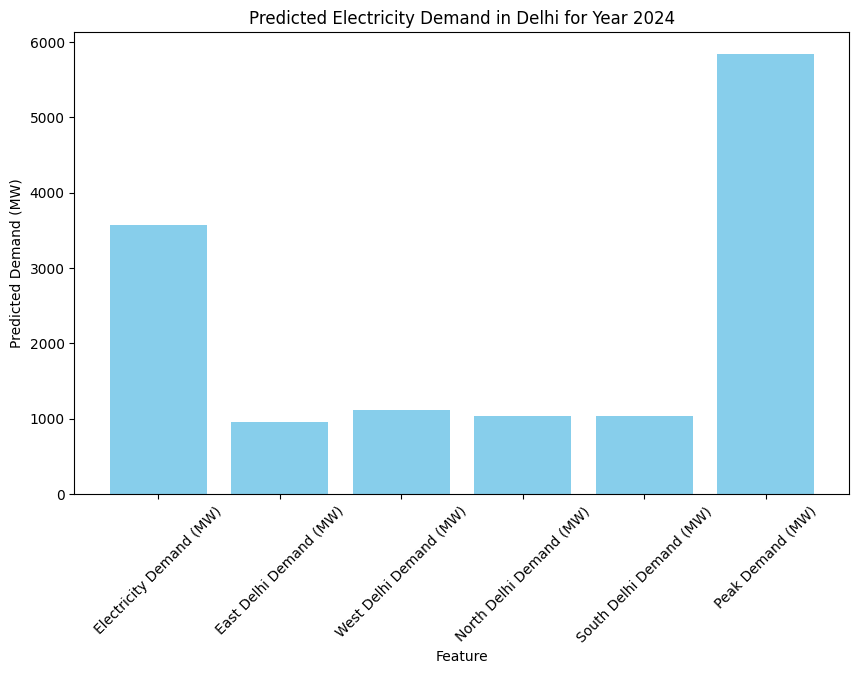

In [15]:
def bar_chart(year, day, month, weekday, temperature, humidity, day_type):
    # Encode the day_type
    day_type_encoded = label_encoder.transform([day_type])[0]

    # Create the input DataFrame
    input_data = pd.DataFrame({
        'Day': [day],
        'Month': [month],
        'Year': [year],
        'Weekday': [weekday],
        'Temperature (°C)': [temperature],
        'Humidity (%)': [humidity],
        'Day Type Encoded': [day_type_encoded]
    })

    # Predict electricity demand
    predicted_values = model.predict(input_data)[0]

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(targets, predicted_values, color='skyblue')
    plt.xlabel("Feature")
    plt.ylabel("Predicted Demand (MW)")
    plt.title(f"Predicted Electricity Demand in Delhi for Year {year}")
    plt.xticks(rotation=45)  # Rotate labels if necessary
    plt.show()

# Example usage:
bar_chart(
    year=2024,
    day=15,
    month=9,
    weekday=4,  # Thursday
    temperature=32.0,
    humidity=60,
    day_type="Weekday"
)
